In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('api.csv')

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

In [3]:
df.head()

,budget,popularity,release_date,revenue,title,vote_average,vote_count,release_year,return,day,release_month,actor,director
0,0.0,3.860491,1988-10-21,0.0,Ariel,7.1,44.0,1988,0.000000,Friday,10,"['Turo Pajala', 'Susanna Haavisto', 'Matti Pel...",['Aki Kaurismäki']
1,0.0,2.292110,1986-10-16,0.0,Shadows in Paradise,7.1,35.0,1986,0.000000,Thursday,10,"['Matti Pellonpää', 'Kati Outinen', 'Sakari Ku...",['Aki Kaurismäki']
2,4000000.0,9.026586,1995-12-09,4300000.0,Four Rooms,6.5,539.0,1995,1.075000,Saturday,12,"['Tim Roth', 'Antonio Banderas', 'Jennifer Bea...","['Allison Anders', 'Alexandre Rockwell', 'Robe..."
3,0.0,5.538671,1993-10-15,12136938.0,Judgment Night,6.4,79.0,1993,0.000000,Friday,10,"['Emilio Estevez', 'Cuba Gooding Jr.', 'Denis ...",['Stephen Hopkins']
4,11000000.0,42.149697,1977-05-25,775398007.0,Star Wars,8.1,6778.0,1977,70.490728,Wednesday,5,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",['George Lucas']


In [6]:
df.dtypes

budget                  float64
popularity              float64
release_date     datetime64[ns]
revenue                 float64
title                    object
vote_average            float64
vote_count              float64
release_year              int64
return                  float64
day                      object
release_month             int64
actor                    object
director                 object
dtype: object

<AxesSubplot: xlabel='budget', ylabel='popularity'>

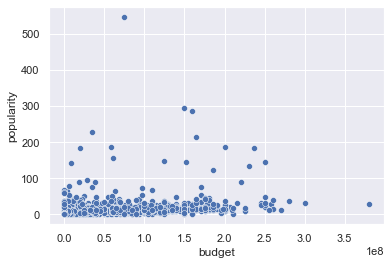

In [7]:
sns.scatterplot(data=df, x='budget', y='popularity')

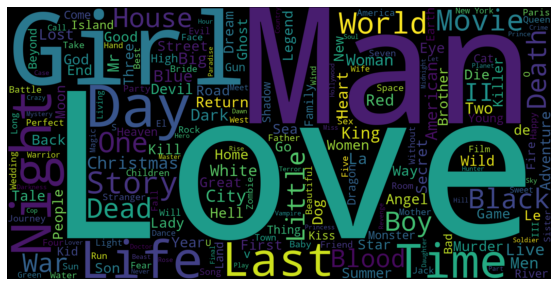

In [10]:
texto = " ".join(df['title'])

wordcloud = WordCloud(width=1600, height=800).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
df_numerical = df[['budget','popularity','revenue','vote_average','vote_count','return']]

In [11]:
df.head(2)

,budget,popularity,release_date,revenue,title,vote_average,vote_count,release_year,return,day,release_month,actor,director
0,0.0,3.860491,1988-10-21,0.0,Ariel,7.1,44.0,1988,0.0,Friday,10,"['Turo Pajala', 'Susanna Haavisto', 'Matti Pel...",['Aki Kaurismäki']
1,0.0,2.292110,1986-10-16,0.0,Shadows in Paradise,7.1,35.0,1986,0.0,Thursday,10,"['Matti Pellonpää', 'Kati Outinen', 'Sakari Ku...",['Aki Kaurismäki']


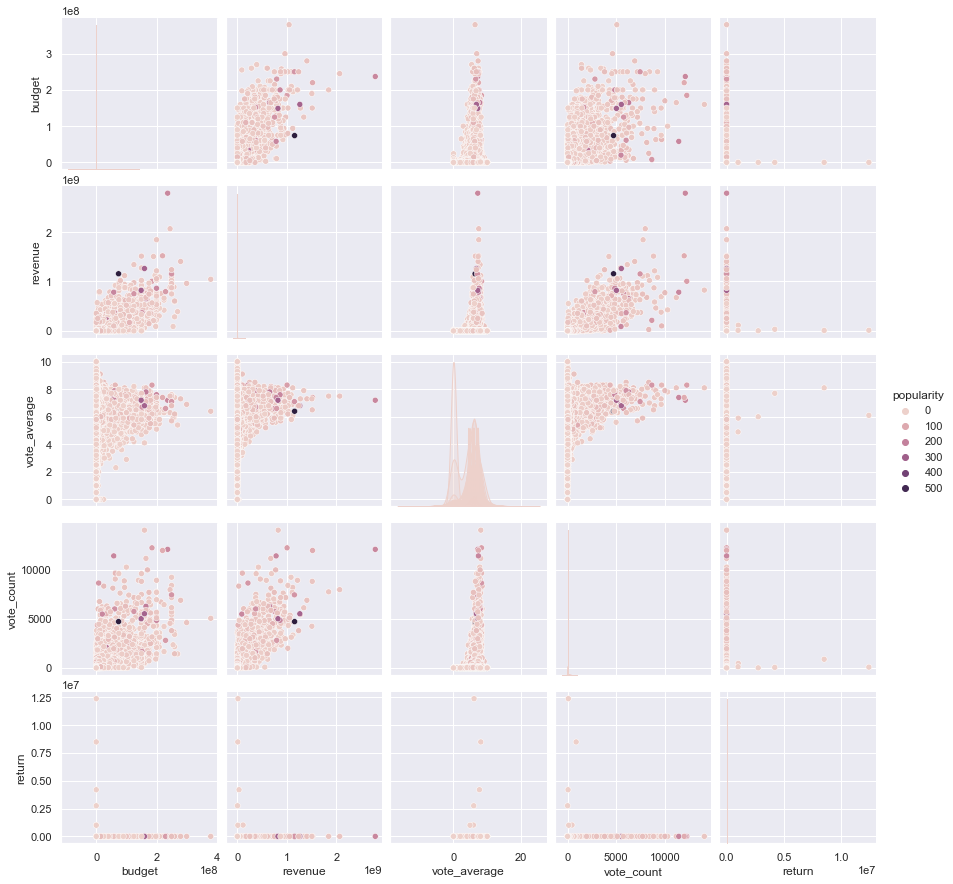

In [14]:
sns.pairplot(df_numerical, hue = "popularity")

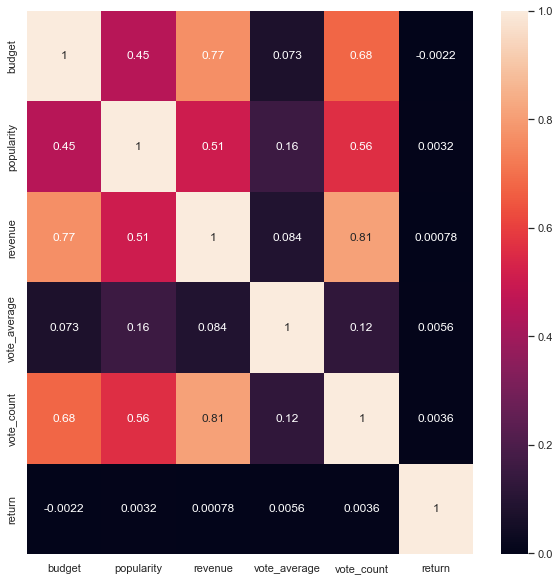

In [15]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df_numerical.corr(), annot = True)
plt.show()